In [25]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from collections import OrderedDict
import pylab
import seaborn as sns
import scipy.stats as stats
import math

In [4]:
straight = pd.read_csv('data/Straight_1.csv')
leftArc = pd.read_csv('data/LeftArc.csv')
rightArc = pd.read_csv('data/RightArc.csv')
initial = pd.read_csv('data/Start.csv')

In [5]:
straight.to_latex('output/straight')
leftArc.to_latex('output/leftArc')
rightArc.to_latex('output/rightArc')
initial.to_latex('output/initial')

In [6]:
print("Start Position: ")
display(initial)
print ("--------------------")
print ("")
print("Coordinates for Straight runs:")
display(straight)
print ("--------------------")
print ("")
print("Coordinates for Left Arc runs:")
display(leftArc)
print ("--------------------")
print ("")
print("Coordinates for Right Arc runs:")
display(rightArc)

Start Position: 


,X_L(cm),Y_L(cm),X_R(cm),Y_R(cm),Angle(degrees)
0,0,0,8.3,0,90


--------------------

Coordinates for Straight runs:


,X_L (cm),Y_L (cm),X_R (cm),Y_R (cm),Theta (degrees)
0,0.2,52.2,8.4,52.1,89
1,2.0,52.4,10.3,52.0,87
2,1.6,52.4,9.9,52.0,88
3,1.2,52.3,9.5,52.0,88
4,0.4,52.3,8.7,52.2,89
5,-0.5,52.4,7.2,52.3,90
6,-1.5,52.4,6.7,52.4,90
7,1.5,52.5,9.7,52.1,87
8,0.2,52.5,8.4,52.4,89
9,0.2,52.5,8.3,52.5,88


--------------------

Coordinates for Left Arc runs:


,X_L (cm),Y_L (cm),X_R (cm),Y_R (cm),Theta (degrees)
0,-19.7,35.0,-15.8,42.3,145
1,-19.3,35.5,-15.2,42.6,142
2,-19.6,35.4,-15.6,42.6,145
3,-18.1,35.5,-13.8,42.9,141
4,-19.5,35.2,-15.5,42.3,144
5,-20.0,34.9,-16.2,42.0,148
6,-20.2,34.7,-16.3,41.8,144
7,-17.5,36.5,-13.0,43.4,142
8,-18.6,35.7,-15.1,42.6,145
9,-19.2,35.6,-14.8,42.7,146


--------------------

Coordinates for Right Arc runs:


,X_L (cm),Y_L (cm),X_R (cm),Y_R (cm),Theta (degrees)
0,23.7,42.2,27.5,35.0,33
1,22.4,43.2,26.5,36.1,34
2,22.7,42.6,26.9,35.5,34
3,23.2,42.5,27.3,35.2,34
4,21.5,43.7,25.8,36.7,35
5,20.3,43.5,25.0,36.7,39
6,22.6,43.0,26.7,36.0,40
7,23.1,42.7,27.2,35.5,34
8,24.2,42.1,28.1,34.8,33
9,22.9,43.0,27.0,35.8,34


In [13]:
initial[initial.columns[4]]

0    90
Name: Angle(degrees), dtype: int64

In [7]:
st_ang_mean = straight[straight.columns[4]].mean()
leftArc_ang_mean = leftArc[leftArc.columns[4]].mean()
rightArc_ang_mean = rightArc[rightArc.columns[4]].mean()


st_ang_std = straight[straight.columns[4]].std()
leftArc_ang_std = leftArc[leftArc.columns[4]].std()
rightArc_ang_std= rightArc[rightArc.columns[4]].std()


In [8]:
#Calculated Distances:
"""
The power has been set to 50% and duration was 3 seconds.
From http://www.philohome.com/nxtmotor/nxtmotor.htm
It is observed that in the unloaded condition,
50% power results to around 80 rpm
Diameter of the wheels are 5.7cm
"""
t = 3
N = 80 
d = 5.7
st_distance = np.pi*d*N*3/60
st_distance


71.6283125018473

In [9]:
initial_left=np.array([initial[initial.columns[0]],initial[initial.columns[1]]]).T
initial_right=np.array([initial[initial.columns[2]],initial[initial.columns[3]]]).T

st_left=np.array([straight[straight.columns[0]],straight[straight.columns[1]]]).T
st_right=np.array([straight[straight.columns[2]],straight[straight.columns[3]]]).T

lftArc_left=np.array([leftArc[leftArc.columns[0]],leftArc[leftArc.columns[1]]]).T
lftArc_right=np.array([leftArc[leftArc.columns[2]],leftArc[leftArc.columns[3]]]).T

rtArc_left=np.array([rightArc[rightArc.columns[0]],rightArc[rightArc.columns[1]]]).T
rtArc_right=np.array([rightArc[rightArc.columns[2]],rightArc[rightArc.columns[3]]]).T

In [17]:
"""
Considering that the robot center is the center of the line
joining the two points
"""
init_centers = np.array([(initial_left[:,0]+initial_right[:,0])/2,(initial_left[:,1]+initial_right[:,1])/2,
                         initial[initial.columns[4]]])
st_centers = np.array([(st_left[:,0]+st_right[:,0])/2,(st_left[:,1]+st_right[:,1])/2,
                      straight[straight.columns[4]]])
rt_centers = np.array([(rtArc_left[:,0]+rtArc_right[:,0])/2,(rtArc_left[:,1]+rtArc_right[:,1])/2,
                      rightArc[rightArc.columns[4]]])
lt_centers = np.array([(lftArc_left[:,0]+lftArc_right[:,0])/2,(lftArc_left[:,1]+lftArc_right[:,1])/2,
                      leftArc[leftArc.columns[4]]])

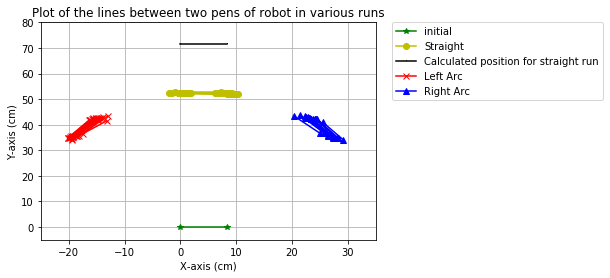

In [21]:
plt.plot((initial_left[:,0],initial_right[:,0]),(initial_left[:,1],initial_right[:,1]), 
         marker='*', color = 'g', label= "initial")
plt.plot((st_left[:,0],st_right[:,0]),(st_left[:,1],st_right[:,1]), 
         marker='o', color='y', label= "Straight")
plt.plot((initial_left[:,0],initial_right[:,0]),
            (initial_left[:,1]+st_distance,initial_right[:,1]+st_distance),
            marker=',', color = 'k', label = "Calculated position for straight run" )
plt.plot((lftArc_left[:,0],lftArc_right[:,0]),(lftArc_left[:,1],lftArc_right[:,1]), 
         marker='x', color='r', label= "Left Arc")
plt.plot((rtArc_left[:,0],rtArc_right[:,0]),(rtArc_left[:,1],rtArc_right[:,1]), 
         marker='^', color='b', label= "Right Arc")
plt.plot()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Plot of the lines between two pens of robot in various runs")
plt.xlabel("X-axis (cm)")
plt.ylabel("Y-axis (cm)")
plt.xlim(-25,35)
plt.ylim(-5,80)
plt.grid(True)
pylab.savefig('output/line_plot.png', bbox_inches='tight')
plt.show()

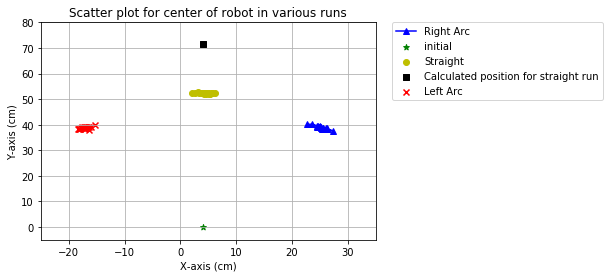

In [22]:
plt.scatter(init_centers[0,:],init_centers[1,:], marker='*', color = 'g', label= "initial")
plt.scatter(st_centers[0,:],st_centers[1,:], marker='o', color='y', label= "Straight")
plt.scatter(init_centers[0,:],init_centers[1,:]+st_distance,
            marker=',', color = 'k', label = "Calculated position for straight run" )

plt.scatter(lt_centers[0,:],lt_centers[1,:], marker='x', color='r', label= "Left Arc")
plt.plot(rt_centers[0,:],rt_centers[1,:], marker='^', color='b', label= "Right Arc")

plt.plot()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Scatter plot for center of robot in various runs")
plt.xlabel("X-axis (cm)")
plt.ylabel("Y-axis (cm)")
plt.xlim(-25,35)
plt.ylim(-5,80)
plt.grid(True)
pylab.savefig('output/scatter_plot.png', bbox_inches='tight')
plt.show()

In [36]:
math.sin(math.radians(88))

0.9993908270190958

In [63]:
#source: https://stackoverflow.com/questions/28417604/plotting-a-line-from-a-coordinate-with-and-angle

def plot_point(point, angle, marker,color, length=0.2):
    '''
    point - Tuple (x, y)
    angle - Angle you want your end point at in degrees.
    length - Length of the line you want to plot.

    Will plot the line on a 10 x 10 plot.
    '''

    # unpack the first point
    x, y = point

    # find the end point
    endy = y+(length * math.sin(math.radians(angle)))
    endx = x+(length * math.cos(math.radians(angle)))
    
    plt.plot([x, endx], [y, endy],color = color,label='pose')

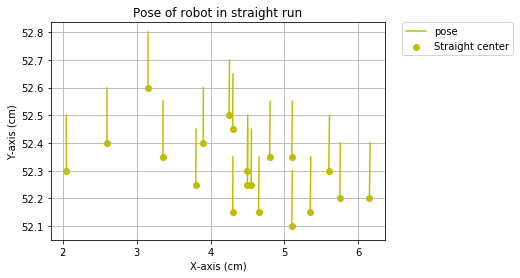

In [84]:
plt.scatter(st_centers[0,:],st_centers[1,:], marker='o', color='y', label= "Straight center")
for i in np.arange(st_centers.shape[1]):
    plot_point(point=(st_centers[0,i],st_centers[1,i]), angle=st_centers[2,i],marker='o',color='y')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Pose of robot in straight run")
plt.xlabel("X-axis (cm)")
plt.ylabel("Y-axis (cm)")
plt.grid(True)
pylab.savefig('output/scatter_plot_st.png', bbox_inches='tight')
plt.show()

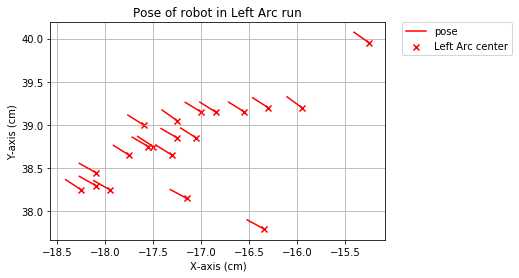

In [85]:
plt.scatter(lt_centers[0,:],lt_centers[1,:], marker='x', color='r', label= "Left Arc center")
for i in np.arange(lt_centers.shape[1]):
    plot_point(point=(lt_centers[0,i],lt_centers[1,i]), angle=lt_centers[2,i],marker='x',color='r')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Pose of robot in Left Arc run")
plt.xlabel("X-axis (cm)")
plt.ylabel("Y-axis (cm)")
plt.grid(True)
pylab.savefig('output/scatter_plot_lt.png', bbox_inches='tight')
plt.show()

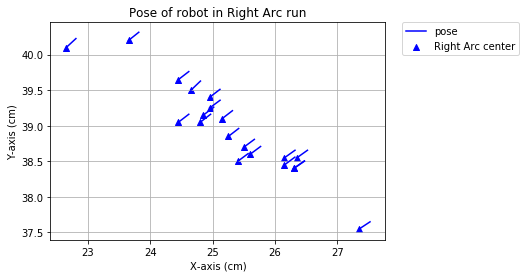

In [86]:
plt.scatter(rt_centers[0,:],rt_centers[1,:], marker='^', color='b', label= "Right Arc center")
for i in np.arange(rt_centers.shape[1]):
    plot_point(point=(rt_centers[0,i],rt_centers[1,i]), angle=rt_centers[2,i],marker='^',color='b')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Pose of robot in Right Arc run")
plt.xlabel("X-axis (cm)")
plt.ylabel("Y-axis (cm)")
plt.grid(True)
pylab.savefig('output/scatter_plot_rt.png', bbox_inches='tight')
plt.show()

In [87]:
#Calculate accuracy and precision
#-----
mean_straight = np.array(np.mean(st_centers,axis=1))[:,np.newaxis]
mean_straight_y = np.array(np.mean(st_centers,axis=0))[:,np.newaxis]
st_calc=np.array([(init_centers[0,:]),(init_centers[1,:]+st_distance)])

accuracy_straight = np.linalg.norm(mean_straight-init_centers[0:1,:])/ np.linalg.norm(st_calc-init_centers[0:1,:])*100
stdDev_straight = np.std(st_centers,axis =1)

In [72]:
accuracy_straight

144.1936503080479

In [73]:
print (mean_straight)
print (stdDev_straight)
print (st_ang_mean)
print (st_ang_std)

[[ 4.3875]
 [52.3   ]
 [88.7   ]]
[1.01364133 0.125499   1.00498756]
88.7
1.0310954828418377


In [75]:
mean_lt = np.array(np.mean(lt_centers,axis=1))[:,np.newaxis]
stdDev_lt = np.std(lt_centers,axis =1)

mean_rt = np.array(np.mean(rt_centers,axis=1))[:,np.newaxis]
stdDev_rt = np.std(rt_centers,axis =1)

In [76]:
print (mean_lt)
print (stdDev_lt)
print (leftArc_ang_mean)
print (leftArc_ang_std)

[[-17.1525]
 [ 38.7775]
 [145.55  ]]
[0.75622004 0.477356   2.22429764]
145.55
2.2820812292383685


In [77]:
print (mean_rt)
print (stdDev_rt)
print (rightArc_ang_mean)
print (rightArc_ang_std)

[[25.245]
 [38.95 ]
 [33.7  ]]
[1.02870064 0.61583277 2.26053091]
33.7
2.319255778999172


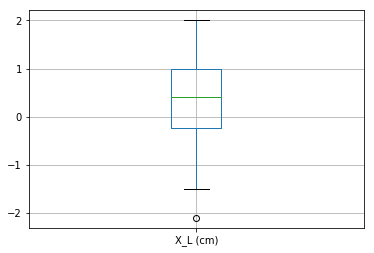

In [78]:
#Box Plots:
straight.boxplot(column=straight.columns[0])

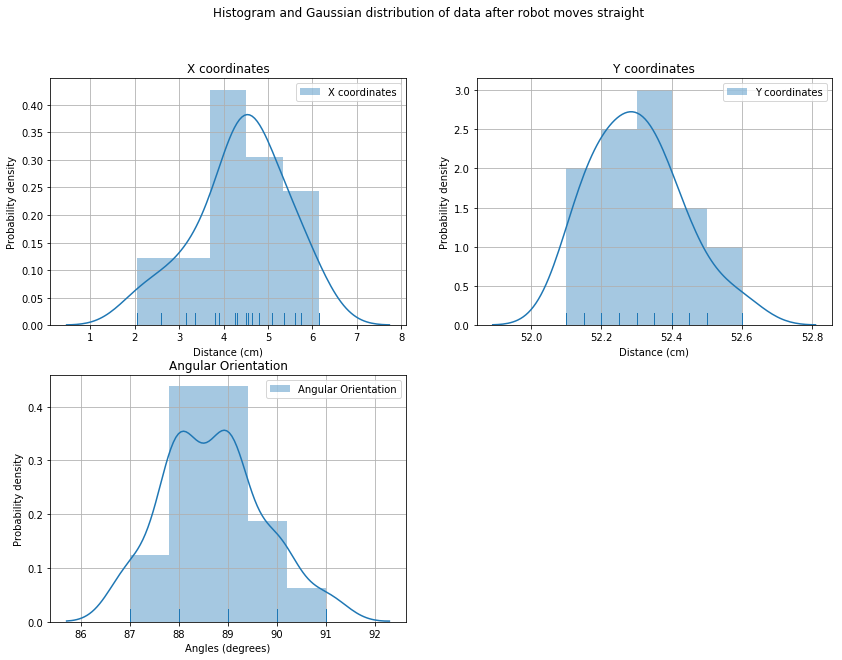

In [100]:
fig = plt.figure(figsize=(14,10))
ax = plt.subplot(221)
#ax.hist(st_centers[0,:], normed= True,label='Histogram of X coordinates')
sns.distplot(st_centers[0,:],hist=True, rug=True,
             label='X coordinates')
plt.title('X coordinates')
plt.ylabel('Probability density')
plt.xlabel('Distance (cm)')
plt.legend()
plt.grid(True)

ax = plt.subplot(222)
#ax.hist(st_centers[1,:], normed= True,label='Histogram of Y coordinates')
sns.distplot(st_centers[1,:],hist=True, rug=True,
             label='Y coordinates')
plt.title('Y coordinates')
plt.ylabel('Probability density')
plt.xlabel('Distance (cm)')
plt.legend()
plt.grid(True)

ax = plt.subplot(223)
#ax.hist(st_centers[1,:], normed= True,label='Histogram of Y coordinates')
sns.distplot(st_centers[2,:],hist=True, rug=True, bins= 5,
             label='Angular Orientation')
plt.title('Angular Orientation')
plt.ylabel('Probability density')
plt.xlabel('Angles (degrees)')
plt.legend()
plt.grid(True)



plt.suptitle('Histogram and Gaussian distribution of data after robot moves straight')
pylab.savefig('output/histplot_st.png', bbox_inches='tight')
plt.show()


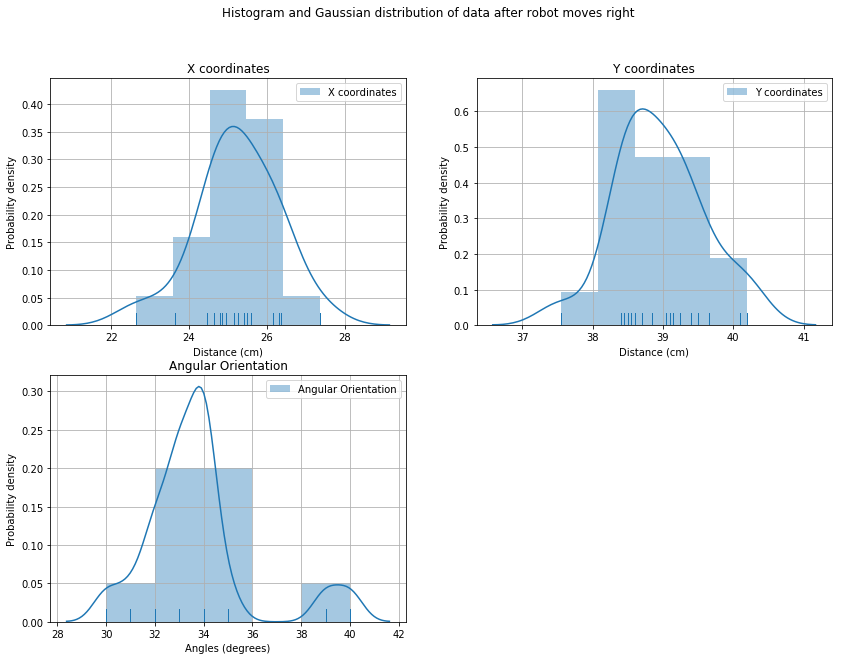

In [103]:
fig = plt.figure(figsize=(14,10))
ax = plt.subplot(221)
sns.distplot(rt_centers[0,:],hist=True, rug=True,
             label='X coordinates')
plt.title('X coordinates')
plt.ylabel('Probability density')
plt.xlabel('Distance (cm)')
plt.legend()
plt.grid(True)

ax = plt.subplot(222)
sns.distplot(rt_centers[1,:],hist=True, rug=True,
             label='Y coordinates')
plt.title('Y coordinates')
plt.ylabel('Probability density')
plt.xlabel('Distance (cm)')
plt.grid(True)
plt.legend()

ax = plt.subplot(223)
#ax.hist(st_centers[1,:], normed= True,label='Histogram of Y coordinates')
sns.distplot(rt_centers[2,:],hist=True, rug=True, bins= 5,
             label='Angular Orientation')
plt.title('Angular Orientation')
plt.ylabel('Probability density')
plt.xlabel('Angles (degrees)')
plt.legend()
plt.grid(True)

plt.suptitle('Histogram and Gaussian distribution of data after robot moves right')
plt.show()
pylab.savefig('output/histplot_rt.png', bbox_inches='tight')


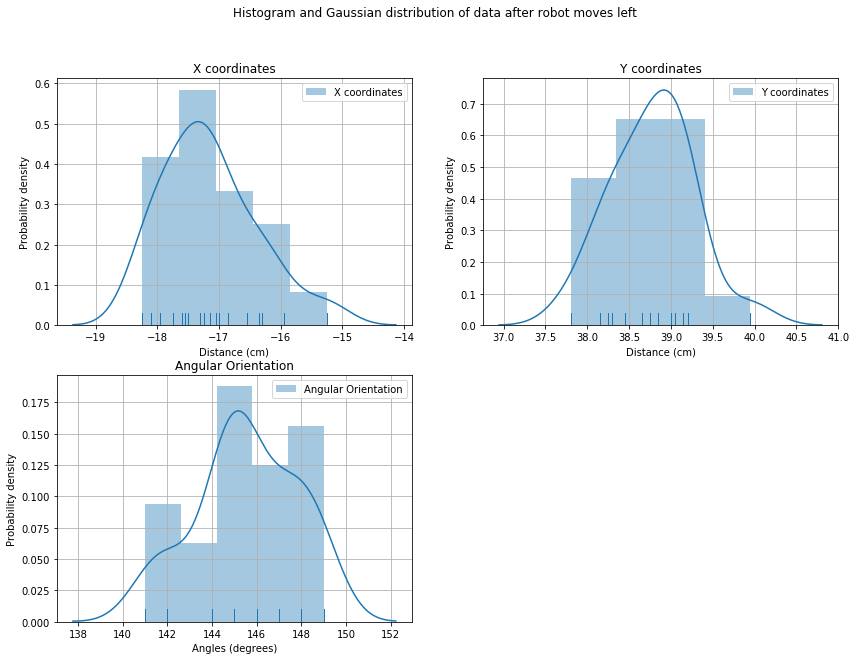

In [104]:
fig = plt.figure(figsize=(14,10))
ax = plt.subplot(221)
sns.distplot(lt_centers[0,:],hist=True, rug=True,
             label='X coordinates')
plt.title('X coordinates')
plt.ylabel('Probability density')
plt.xlabel('Distance (cm)')
plt.legend()
plt.grid(True)

ax = plt.subplot(222)
sns.distplot(lt_centers[1,:],hist=True, rug=True,
             label='Y coordinates')
plt.title('Y coordinates')
plt.ylabel('Probability density')
plt.xlabel('Distance (cm)')
plt.legend()
plt.grid(True)



ax = plt.subplot(223)
#ax.hist(st_centers[1,:], normed= True,label='Histogram of Y coordinates')
sns.distplot(lt_centers[2,:],hist=True, rug=True, bins= 5,
             label='Angular Orientation')
plt.title('Angular Orientation')
plt.ylabel('Probability density')
plt.xlabel('Angles (degrees)')
plt.legend()
plt.grid(True)

plt.suptitle('Histogram and Gaussian distribution of data after robot moves left')
pylab.savefig('output/histplot_lt.png', bbox_inches='tight')
plt.show()


In [109]:
#Prove that data observed is Gaussian

normtest_st_x=stats.normaltest(st_centers[0,:])
normtest_st_y=stats.normaltest(st_centers[1,:])
normtest_st_theta=stats.normaltest(st_centers[2,:])

normtest_rt_x=stats.normaltest(rt_centers[0,:])
normtest_rt_y=stats.normaltest(rt_centers[1,:])
normtest_rt_theta=stats.normaltest(rt_centers[2,:])

normtest_lt_x=stats.normaltest(lt_centers[0,:])
normtest_lt_y=stats.normaltest(lt_centers[1,:])
normtest_lt_theta=stats.normaltest(lt_centers[2,:])



print ("Straight\n X:(",normtest_st_x,"), \n Y:(",normtest_st_y,
       "), \n Theta:(",normtest_st_theta,")")
print ("")
print ("Left\n X:(",normtest_lt_x,"), \n Y:(",normtest_lt_y,")",
       "), \n Theta:(",normtest_lt_theta,")")
print ("")
print ("Right\n X:(",normtest_rt_x,"), \n Y:(",normtest_rt_y,")",
       "), \n Theta:(",normtest_rt_theta,")")


Straight
 X:( NormaltestResult(statistic=1.371372402310409, pvalue=0.503744440930816) ), 
 Y:( NormaltestResult(statistic=1.3615147981240063, pvalue=0.5062334264053624) ), 
 Theta:( NormaltestResult(statistic=0.5843507746669966, pvalue=0.7466375737159886) )

Left
 X:( NormaltestResult(statistic=2.7184130084071305, pvalue=0.2568645170239329) ), 
 Y:( NormaltestResult(statistic=0.7809155283018485, pvalue=0.6767470130600225) ) ), 
 Theta:( NormaltestResult(statistic=0.47341382184593456, pvalue=0.7892225666369647) )

Right
 X:( NormaltestResult(statistic=1.9553986190897548, pvalue=0.37617556757037834) ), 
 Y:( NormaltestResult(statistic=0.5358688718457848, pvalue=0.7649579332196751) ) ), 
 Theta:( NormaltestResult(statistic=11.920848851191815, pvalue=0.002578817223687105) )


In [107]:
assert (normtest_st_x.pvalue>0.05)
assert (normtest_st_y.pvalue>0.05)
assert (normtest_st_theta.pvalue>0.05)

assert (normtest_lt_x.pvalue>0.05)
assert (normtest_lt_y.pvalue>0.05)
assert (normtest_lt_theta.pvalue>0.05)

assert (normtest_rt_x.pvalue>0.05)
assert (normtest_rt_y.pvalue>0.05)
assert not(normtest_rt_theta.pvalue>0.05)